# Práctica de Aprendizaje Automático

En esta práctica vamos a estudiar unos datos utilizando métodos de aprendizaje automático.

Esta práctica esta desarrollada por Belén Gómez Arnaldo con NIA 100472037 y Luis Gómez-Manzanilla Nieto con NIA 100472006.

---

## Imports

Para facilitar el resto del código, pondremos todos los imports necesarios a continuación.

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Lectura de datos 

Vamos a empezar leyendo el archivo de entrada *wind_ava.csv* e inctroduciendolo en un objeto de pandas

In [127]:
wind_ava = pd.read_csv('wind_ava.csv.gz', compression="gzip")

A continuación separaremos los conjuntos siendo *X* las entradas de *wind_ava* para la localización de Sotavento (13) y siendo *y* la energía eolíca que producirá el parque de Sotavento. 

In [128]:
#Solo nos interesan las variables que terminan en .13
x = wind_ava.filter(regex='\.13$')
y = wind_ava['energy']

---

## EDA

El primer paso de la práctica es realizar un EDA simplificado para conocer las características del conjunto de datos que estamos estudiando.

Para hacer una primera aproximación de los datos podemos utilizar la función *head()* que devueve las primeras 5 entradas.

In [129]:
x.head()

,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,stl1.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,99846.319914,280.960661,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,99917.733093,279.296651,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,99764.378681,278.233956,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,99672.670459,280.787263,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,99372.811211,279.583112,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


A primera vista los datos de todas las columnas parecen ser numéricos, pero vamos a anlizarlos más en profundidad.

### Dimension 

In [130]:
print('Dimensión de los datos')
print('===============================') 
print(x.shape)


Dimensión de los datos
(4748, 22)


El conjunto de datos tiene 22 características y 4748 instancias.

### Análisis de variables

In [131]:
print('Los datos son de los siguientes tipos')
print('===============================')
x.info()

Los datos son de los siguientes tipos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   p54.162.13  4748 non-null   float64
 1   p55.162.13  4748 non-null   float64
 2   cape.13     4748 non-null   float64
 3   p59.162.13  4748 non-null   float64
 4   lai_lv.13   4748 non-null   float64
 5   lai_hv.13   4748 non-null   float64
 6   u10n.13     4748 non-null   float64
 7   v10n.13     4748 non-null   float64
 8   sp.13       4748 non-null   float64
 9   stl1.13     4748 non-null   float64
 10  u10.13      4748 non-null   float64
 11  v10.13      4748 non-null   float64
 12  t2m.13      4748 non-null   float64
 13  stl2.13     4748 non-null   float64
 14  stl3.13     4748 non-null   float64
 15  iews.13     4748 non-null   float64
 16  inss.13     4748 non-null   float64
 17  stl4.13     4748 non-null   float64
 18  fsr.13      4748 non-null   fl

Como se puede ver, todos los datos de las columnas son del tipo float64, es decir, no hay variables categóricas. A continuación comprobaremos si hay valores faltantes y, si es así, qué varibles los tienen. 

In [132]:
print('Valores faltantes')
print('======================================')
print(x.isnull().sum())

Valores faltantes
p54.162.13    0
p55.162.13    0
cape.13       0
p59.162.13    0
lai_lv.13     0
lai_hv.13     0
u10n.13       0
v10n.13       0
sp.13         0
stl1.13       0
u10.13        0
v10.13        0
t2m.13        0
stl2.13       0
stl3.13       0
iews.13       0
inss.13       0
stl4.13       0
fsr.13        0
flsr.13       0
u100.13       0
v100.13       0
dtype: int64


Se puede observar que no hay ningún valor faltante en ninguna variable.

A continuación comporbaremos si hay variables con valores constantes

In [133]:
columnas_constantes = []
for columna in x.columns:
    if x[columna].nunique() == 1:
        columnas_constantes.append(columna)

if columnas_constantes:
    print("Las siguientes columnas tienen valores constantes:")
    for columna in columnas_constantes:
        print(f"- {columna}")
else:
    print("No hay columnas con valores constantes.")

No hay columnas con valores constantes.


Aunque no haya variables constantes, puede haber variables con valores muy parecidos. Para comprobar esto vamos a calcular la varianza de las variables y lo mostraremos en un gráfico.

Varianza de las variables
p54.162.13    2.009369e+09
p55.162.13    4.293153e+01
cape.13       1.482525e+04
p59.162.13    2.151950e+12
lai_lv.13     1.579087e-01
lai_hv.13     1.355691e-02
u10n.13       9.613612e+00
v10n.13       9.100875e+00
sp.13         5.093529e+05
stl1.13       4.114356e+01
u10.13        9.973619e+00
v10.13        9.355127e+00
t2m.13        3.798852e+01
stl2.13       3.077972e+01
stl3.13       2.100230e+01
iews.13       1.346989e-01
inss.13       1.436517e-01
stl4.13       1.262291e+01
fsr.13        5.779241e-05
flsr.13       8.903704e-03
u100.13       2.344235e+01
v100.13       2.178604e+01
dtype: float64


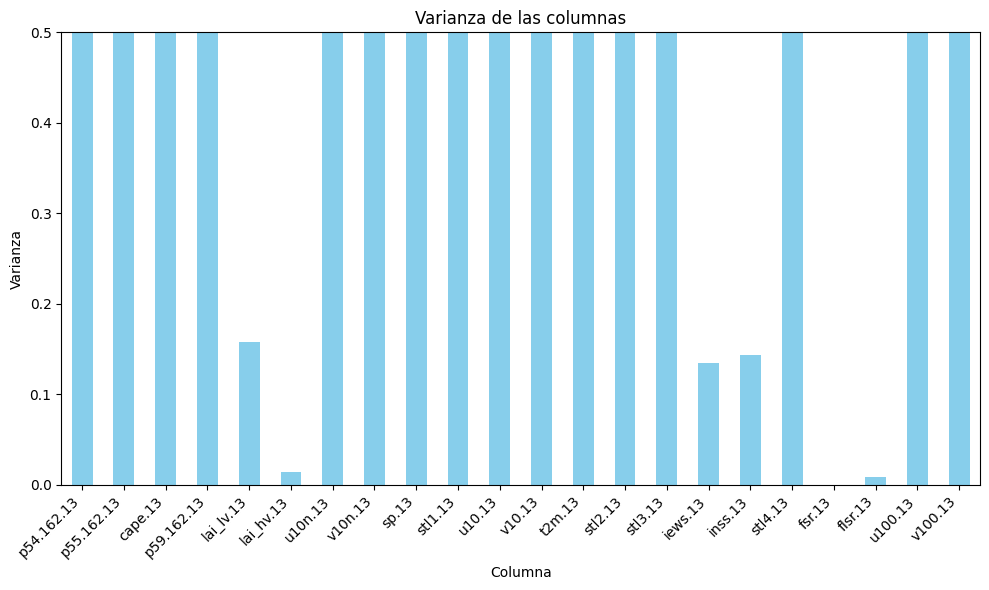

In [134]:
print('Varianza de las variables')
print(x.var())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
x.var().plot(kind='bar', color='skyblue')
plt.title('Varianza de las columnas')
plt.xlabel('Columna')
plt.ylabel('Varianza')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()

Como se puede ver con estos resultados, hay algunas variables que tienen una varianza muy pequeña. Esto podría sugerir que los datos de estas variables son muy parecidos y no estarían influyendo mucho en el modelo

A continuación vamos a estudiar la correlación entre las variables. Utilizaremos un mapa de calor para representar la correlación entre variables.

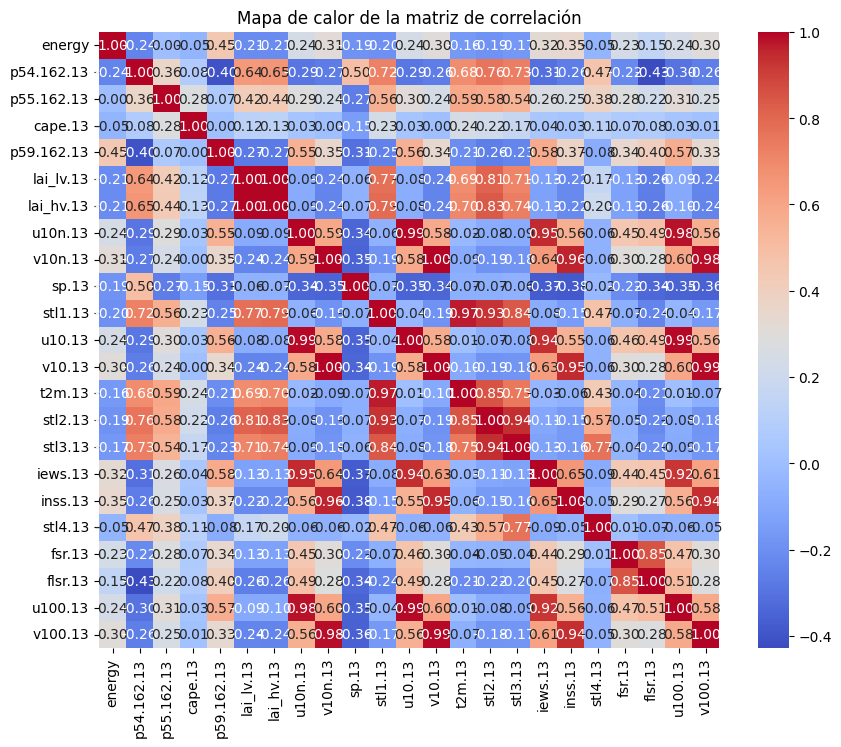

In [135]:
x_copia = x.copy()
x_copia.insert(0, "energy", y)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(x_copia.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlación')
plt.show()

Las casillas de color rojo oscuro corresponden a las varibles con más correlación. En un futuro se podrían evaluar las varibles para determinar si alguna se podría eliminar.

### Análisis de la variable de salida

Para determinar si es un problema de regresión o de clasificación, estudiaremos la variables de salida *energy*

In [136]:
print('La variable de salida es de tipo:')
print('===============================')
y.info()

La variable de salida es de tipo:
<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype  
--------------  -----  
4748 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


La variable de salida es de tipo float64, es decir, es una variable continua, por lo que es un problema de regresión. Continuaremos analizando la distribución de la variable de salida.

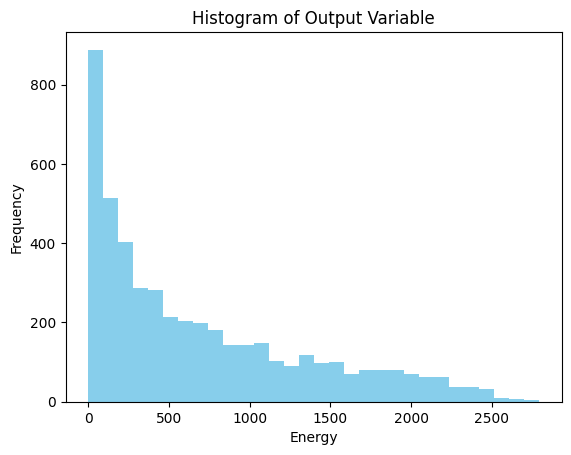

In [137]:
plt.hist(y, bins=30, color='skyblue')
plt.title('Histogram of Output Variable')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

Como podemos observar, tiene una distribución exponencial. Esto indica que para valores de poca energía hay muchas más muestras que para valores mayores.

## Evalucaión

Para llevar a cabo la evaluación outer a utilizar Holdout, donde dividiremos el conjunto de datos en dos, uno para entrenar y otro para comprobar el modelo. El conjunto de entrenamiento es 2/3 del conjunto total. Utilizaremos 3-fold crossvalidation para el ajuste de los hiperparámetros. Para la búsqueda de los hiperparámetros utilizaremos GridSearch, a menos que haya modelos con muchas combinaciones donde usaremos la búsqueda aleatoria.

Primero evaluaremos los modelos con sus hiperparámetros por omisión. Depués ajustaremos los hiperpárametros. Al final incluiremos unas conclusiones sobre qué modelos son mejores y cuáles tardan menos tiempo.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state=100472037)

Para evaluar los modelos cacularemos el error cuadrátcio medio y el coeficiente de derterminación con estas funciones

In [170]:
#Error cuadrático medio
def rmse(y_test, y_test_pred):
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

#coeficiente de determinación
def r2(y_test, y_test_pred):
    return metrics.r2_score(y_test, y_test_pred)

### Preproceso

Hay ciertos modelos que exigen un preproceso de los datos. Debido a esto utilizaremos un pipeline que realizará primero el preproceso de los datos y depués definirá el modelo.

Para el preproceso definiremos varias formas de normalizar lo datos. Más adelantes utilizaremos KNN para determinar la mejor fomra de normalizar los datos, que utilizaremos en todo el resto de modelos.

In [140]:
#normalización standard
standar = make_column_transformer(
    (StandardScaler(), X_train.columns),
)

#normalizacion por escala min-max
min_max = make_column_transformer(
    (MinMaxScaler(), X_train.columns)
)

### Dummy

Para una primera aproximación realizaremos el RegresorDummy basado en la media. Este es un modelo trivial y todos los modelos que hagamos más adelante deberían mejorar el resultado de este.

In [141]:
# Crear un modelo de referencia usando el dummy
modelo_dummy = DummyRegressor(strategy='mean')
t1 = time.time()
modelo_dummy.fit(X_train, y_train)
t2 = time.time()

# Calcular el error cuadrático medio y el coeficiente de determinación 
rmse_mean = rmse(y_test, modelo_dummy.predict(X_test))
r2_mean = r2(y_test, modelo_dummy.predict(X_test))
t_dummy_mean = t2-t1

print(f"RMSE de dummy(mean): {rmse_mean}")
print(f"R^2 de dummy(mean): {r2_mean}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 667.6287990469438
R^2 de dummy(mean): -0.0012269034359306819
Tiempo de entrenamiento:  0.0010001659393310547


A continuación vamos a crear el regrsor dummy basado en la mediana para comprar los resultados.

In [142]:
modelo_dummy_median = DummyRegressor(strategy='median')
t1 = time.time()
modelo_dummy_median.fit(X_train, y_train)
t2 = time.time()

rmse_median= rmse(y_test, modelo_dummy_median.predict(X_test))
r2_median = r2(y_test, modelo_dummy_median.predict(X_test))
t_dummy_median = t2-t1

print(f"RMSE de dummy(mean): {rmse_median}")
print(f"R^2 de dummy(mean): {r2_median}")
print("Tiempo de entrenamiento: ", t2 - t1)

RMSE de dummy(mean): 696.231776442723
R^2 de dummy(mean): -0.08885504571728964
Tiempo de entrenamiento:  0.0


En este caso, el regresor basado en la media tiene menor error. También se puede observar que al ser modelos muy simples tardan poco en ejecutarse.

### KNN

Para poder usar este modelo primero debemos normalizar los datos. Vamos a comprobar cual de las normalizaciones definidas anteriores es más adeaucda para este modelo, es decir, produce menor error.

In [143]:
pipe_knn_st = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn_st.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_st.predict(X_test)

rmse_knn_st = rmse(y_test, y_test_pred)
r2_knn_st = r2(y_test, y_test_pred)
t_knn_st = t2 - t1
print(f"RMSE: {rmse_knn_st}")
print(f"R2: {r2_knn_st}")
print("Tiempo de entrenamiento: ", t_knn_st)

RMSE: 402.4666157668746
R2: 0.6361502255960982
Tiempo de entrenamiento:  0.004998207092285156


In [144]:
pipe_knn = Pipeline([
        ('preproceso', min_max), #entrada del pipeline
        ('regresor', KNeighborsRegressor()) #salida del pipeline
])

np.random.seed(100472037)

t1 = time.time()
pipe_knn.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn.predict(X_test)

rmse_knn = rmse(y_test, y_test_pred)
r2_knn =r2(y_test, y_test_pred)
t_knn = t2 - t1
print(f"RMSE: {rmse_knn}")
print(f"R2: {r2_knn}")
print("Tiempo de entrenamiento: ", t_knn)

RMSE: 418.2405057451519
R2: 0.6070705608374711
Tiempo de entrenamiento:  0.007009983062744141


Se ha comprobado que la mejor normalización es la estándar y es la que usaremos en el resto de modelos que lo necesiten. Ahora vamos a ajustar el hiperperámetro del número de vecinos para conseguir el mejor modelo, usando esta normalización.

In [145]:
# Search space
param_grid = {'regresor__n_neighbors': list(range(2,20))}  # Número de vecinos


# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

pipe_knn_hp = GridSearchCV(pipe_knn_st,
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,)

t1 = time.time()
pipe_knn_hp.fit(X_train, y_train)
t2 = time.time()

y_test_pred = pipe_knn_hp.predict(X_test)

rmse_knn_hp = rmse(y_test, y_test_pred)
r2_knn_hp = r2(y_test, y_test_pred)
t_knn_hp = t2 - t1
print(f"RMSE: {rmse_knn_hp}")
print(f"R2: {r2_knn_hp}")
print("Tiempo de entrenamiento: ", t_knn_hp)
pipe_knn_hp.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
RMSE: 396.9677355680996
R2: 0.6460248241812517
Tiempo de entrenamiento:  3.2913224697113037


{'regresor__n_neighbors': 8}

Se puede observar que ajustando el número de vecinos a 8 se mejora el error del modelo. Dentro del rango utilizado, el valor del mejor hiperparámetro no se encuentra en el extremo. Con este modelo el error mejora mucho con respecto al regresor trivial.

### Arboles de regresión

In [146]:
!pip install --upgrade linear-tree


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


El siguinete modelo que vamos a evaluar es un árbol de regresión lineal. Primero lo evaluaremos sin ajustar los hiperparámetros.

In [147]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(100472037) 

t1 = time.time()
regr.fit(X_train, y_train)
t2 = time.time()

y_test_pred = regr.predict(X_test)

rmse_tree = rmse(y_test, y_test_pred)
r2_tree = r2(y_test, y_test_pred)
t_tree = t2 - t1
print(f"RMSE: {rmse_tree}")
print(f"R2: {r2_tree}")
print("Tiempo de entrenamiento: ", t_tree)

RMSE: 373.98860391251424
R2: 0.6858195744419211
Tiempo de entrenamiento:  3.521667242050171


Aún sin haber ajustado los hiperparámetros, podemos observar que este modelo tine menor error que el modelo dummy, aunque tarda más en ejecutarse. Ahora vamos a estudiar el ajuste de los hiperparámetros para minimizar el error.

In [148]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(4,16,2))}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

regr_hp = GridSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()),
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner,
                         n_jobs=-1, verbose=1,
                        )
np.random.seed(100472037)

t1 = time.time()
regr_hp.fit(X=X_train, y=y_train)
t2 = time.time()

y_test_pred = regr_hp.predict(X_test)

rmse_tree_hp = rmse(y_test, y_test_pred)
r2_tree_hp = r2(y_test, y_test_pred)
t_tree_hp = t2 -t1
print(f"RMSE: {rmse_tree_hp}")
print(f"R2: {r2_tree_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
regr_hp.best_params_, -regr_hp.best_score_

Fitting 3 folds for each of 42 candidates, totalling 126 fits


RMSE: 373.98860391251424
R2: 0.6858195744419211
Tiempo de entrenamiento:  72.41513466835022


({'max_depth': 4, 'min_samples_split': 6}, 152601.30994544283)

### Regresores lineales

Primero crearemos el regresor lineal normal sin ninguna regularización y obtendremos el error de este modelo.

In [149]:
# Creación y entrenamiento del modelo lineal con la normalización standar
# ==============================================================================
pipe_regr_standar = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LinearRegression()) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_regr_standar.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regr_standar.predict(X_test)

rmse_lineal = rmse(y_test, y_test_pred)
r2_lineal = r2(y_test, y_test_pred)
t_lineal = t2 - t1
print(f"RMSE: {rmse_lineal}")
print(f"R2: {r2_lineal}")
print("Tiempo de entrenamiento: ", t_lineal)

RMSE: 547.6271133290638
R2: 0.3263531698314581
Tiempo de entrenamiento:  0.0060498714447021484


Como era de esperar, el regresor lineal mejora los valores del modelo dummy. Sin embargo, en este modelo no se ha utilizado ninguna regularización para controlar el sobreaprendizaje. A continuación, vamos a crear modelos con distintas regularizaciones para comprobar cual es la mejor.

#### Lasso


Primero crearemos el modelo con la regularización Lasso sin ajuste de hiperparámetros.

In [150]:
pipe_lasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', Lasso()) #salida del pipeline
])
np.random.seed(100472037)

t1 = time.time()
pipe_lasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_lasso.predict(X_test)

rmse_lasso = rmse(y_test, y_test_pred)
r2_lasso = r2(y_test, y_test_pred)
t_lasso = t2 -t1
print(f"RMSE: {rmse_lasso}")
print(f"R2: {r2_lasso}")
print("Tiempo de entrenamiento: ", t_lasso)
#print(f"Mejor aplpha: {pipe_lasso['regresor'].alpha_}")

RMSE: 548.349172807975
R2: 0.32457555969869323
Tiempo de entrenamiento:  0.03210186958312988


Vamos a ajustar el hiperparámetro alpha del modelo para observar los resultadod

In [151]:
pipe_regrLasso = Pipeline([
        ('preproceso', standar), #entrada del pipeline
        ('regresor', LassoCV(alphas = np.logspace(-3, 3, 110),cv= 3)) #salida del pipeline
])
np.random.seed(100472037)
t1 = time.time()
pipe_regrLasso.fit(X_train, y_train) #entrena
t2 = time.time()

y_test_pred = pipe_regrLasso.predict(X_test)

rmse_lasso_hp = rmse(y_test, y_test_pred)
r2_lasso_hp = r2(y_test, y_test_pred)
t_lasso_hp = t2 - t1
print(f"RMSE: {rmse_lasso_hp}")
print(f"R2: {r2_lasso_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrLasso['regresor'].alpha_}")


RMSE: 547.6400288924752
R2: 0.3263213940820864
Tiempo de entrenamiento:  0.22523856163024902
Mejor aplpha: 0.20508155677140627


El ajuste de hiperparámetros mejora el modelo, pero no es una mejora muy significativa.

Con la regularización Lasso los coeficientes de las variables pueden llegar a valor 0. En el siguiente gráfico se muestra el valor de las coeficientes de las variables a medida que aumenta la regularización. Cuanto mayor es el valor de alpha más variables quedan excluídas, es decir, su coeficiente es 0.

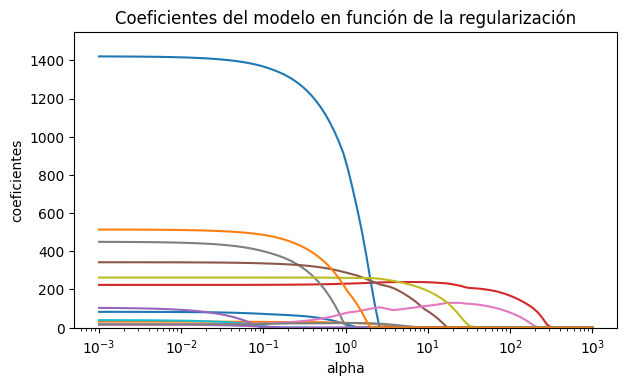

In [152]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrLasso['regresor'].alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', standar),
        ('regresor', Lasso(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-2.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

También podemos observar la evolución del error en función del valor de alpha y ver que el valor óptimo del error está alrededor de 0.205. Si se sigue aumentando el valor de alpha el error aumenta.

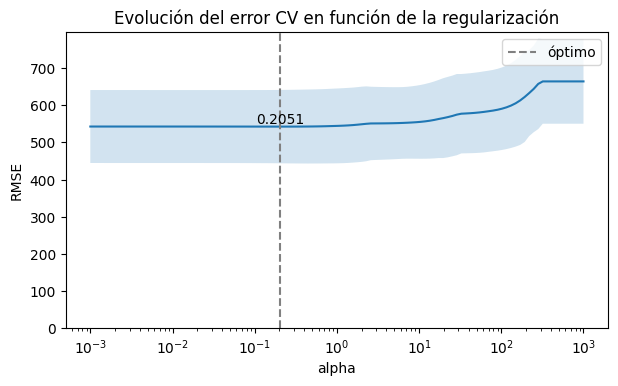

In [153]:
# Evolución del error en función de alpha
# ==============================================================================
# regrLasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = pipe_regrLasso['regresor'].mse_path_.mean(axis=1)
mse_sd = pipe_regrLasso['regresor'].mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrLasso['regresor'].alphas_[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrLasso['regresor'].alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrLasso['regresor'].alphas_, rmse_cv)
ax.fill_between(
    pipe_regrLasso['regresor'].alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')

ax.text(optimo, min_rmse, f'{optimo:.4f}', ha='center', va='bottom')
plt.legend();

#### Ridge

La siguiente regularización que vamos a probar es la regularización Ridge. Primero lo haremos sin ajustar hiperparámetros.

In [154]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
pipe_Ridge = Pipeline([
        ('preproceso', min_max),
        ('regresor', Ridge(
         ))
])

np.random.seed(42)
t1 = time.time()
pipe_Ridge.fit(X_train, y_train) #entrena
t2 = time.time()
t_ridge = t2 - t1
y_test_pred = pipe_Ridge.predict(X_test)

rmse_ridge = rmse(y_test, y_test_pred)
r2_ridge= r2(y_test, y_test_pred)
print(f"RMSE: {rmse_ridge}")
print(f"R2: {r2_ridge}")
print("Tiempo de entrenamiento: ", t_ridge)

RMSE: 551.6182371896022
R2: 0.31649826965590244
Tiempo de entrenamiento:  0.007000446319580078


A continuación vamos a generar un modelo Ridge ajustando sus hiperparámetros.

In [155]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
pipe_regrRidge = Pipeline([
        ('preproceso', min_max),
        ('regresor', RidgeCV(
            alphas          = np.logspace(-3, 6, 200),
            fit_intercept   = True,
            store_cv_values = True
         ))
])

np.random.seed(42)
pipe_regrRidge.fit(X_train, y_train)
t1 = time.time()
pipe_regrRidge.fit(X_train, y_train) #entrena
t2 = time.time()
t_ridge_hp = t2 - t1
y_test_pred = pipe_regrRidge.predict(X_test)

rmse_ridge_hp = rmse(y_test, y_test_pred)
r2_ridge_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_ridge_hp}")
print(f"R2: {r2_ridge_hp}")
print("Tiempo de entrenamiento: ", t2 - t1)
print(f"Mejor aplpha: {pipe_regrRidge['regresor'].alpha_}")


RMSE: 547.4027700804357
R2: 0.32690499481870594
Tiempo de entrenamiento:  0.07036113739013672
Mejor aplpha: 0.007232633896483534


A continuación, vamos a ver cómo evolucionan los coeficientes de las variables con esta regularización. A diferencia de la regularización Lasso, con la regularización ridge los coeficientes dismunuyen pero nunca llega a 0.

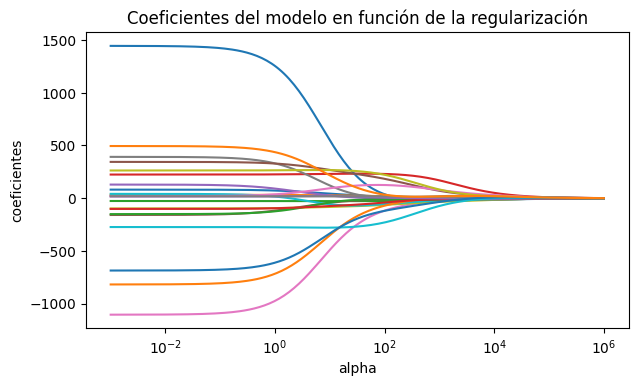

In [156]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = pipe_regrRidge['regresor'].alphas

coefs = []

for alpha in alphas:
    modelo_temp = Pipeline([
        ('preproceso', standar),
        ('regresor', Ridge(alpha=alpha, fit_intercept=False))
    ])
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp['regresor'].coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

También podemos ver la evolución del error con la regularización y ver que el valor óptimo del error está alrededor de 0.007. Para valores mayores de alpha el error aumenta.

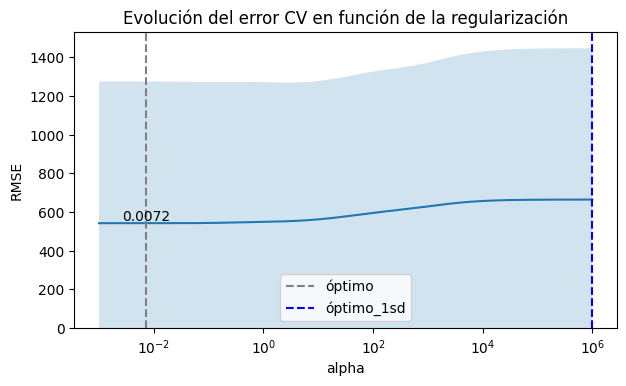

In [157]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = pipe_regrRidge['regresor'].cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = pipe_regrRidge['regresor'].alphas[np.argmin(rmse_cv)]
optimo_1sd   = pipe_regrRidge['regresor'].alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(pipe_regrRidge['regresor'].alphas, rmse_cv)
ax.fill_between(
    pipe_regrRidge['regresor'].alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)


ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
ax.text(optimo, min_rmse, f'{optimo:.4f}', ha='center', va='bottom')
plt.legend();

#### Elastic Net

Por último, vamos a generar el modelo Elastic Net

In [158]:
# ==============================================================================
# Por defecto ElasticNetCV utiliza el mean squared error
pipe_regrElastic = Pipeline([
        ('preproceso', min_max),
        ('regresor', ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 3)
        )
])

np.random.seed(100472037)
t1 = time.time()
pipe_regrElastic.fit(X_train, y_train) #entrena
t2 = time.time()
t_en = t2 - t1
y_test_pred = pipe_regrElastic.predict(X_test)

rmse_en = rmse(y_test, y_test_pred)
r2_en = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_en}")
print(f"R2: {r2_en}")
print("Tiempo de entrenamiento: ", t_en)
print(f"Mejor aplpha: {pipe_regrElastic['regresor'].alpha_}")


RMSE: 547.3884781393232
R2: 0.32694014154839957
Tiempo de entrenamiento:  2.999971866607666
Mejor aplpha: 0.00029331662783900486


Este modelo combina las dos regularizaciones lineales vistas anteriormente y es el modelo lineal que mejor error produce.

#### Comparación

Aunque hemos podido ir viendo los errores de cada modelo, vamos a mostrarlos en el siguiente gráfico, teniendo en cuanta los modelos con los hiperparámetros ajustados.

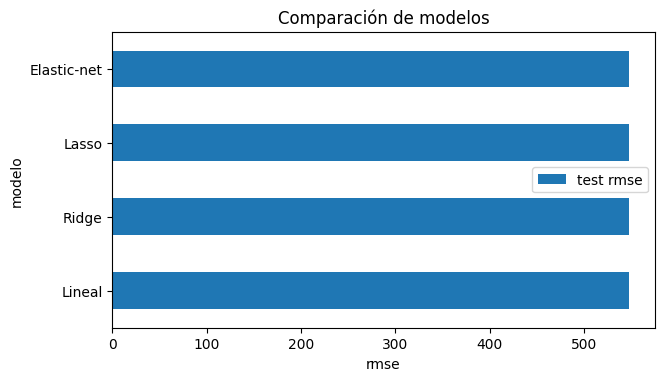

In [159]:
df_comparacion = pd.DataFrame({
                    'modelo': ['Lineal', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lineal, rmse_ridge_hp, rmse_lasso_hp, rmse_en]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

En este problema no hay mucha diferencia entre el modelo lineal y los modelos regularizados en cuanto al rmse. Vamos a comprobar los valores de los coeficientes con cada modelo para ver como cambia la importancia de cada variable.

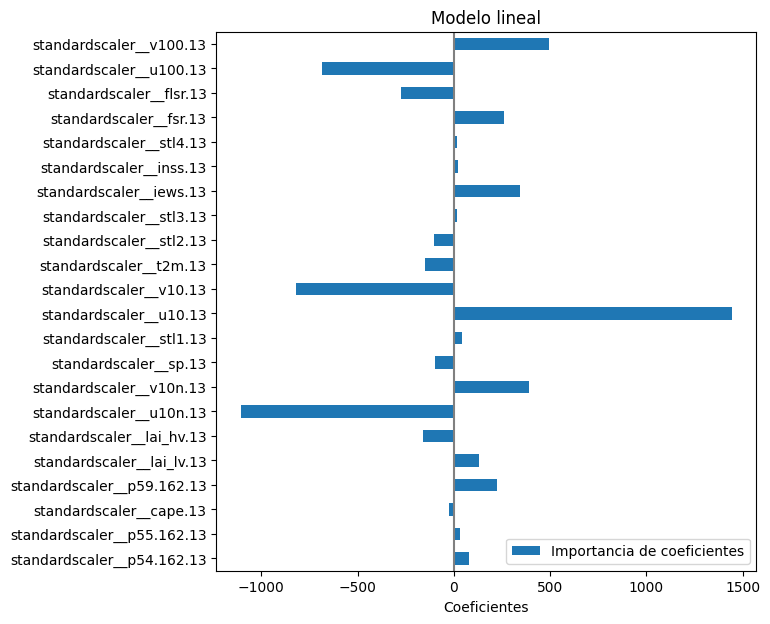

In [160]:
feature_names = pipe_regr_standar[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regr_standar['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo lineal")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

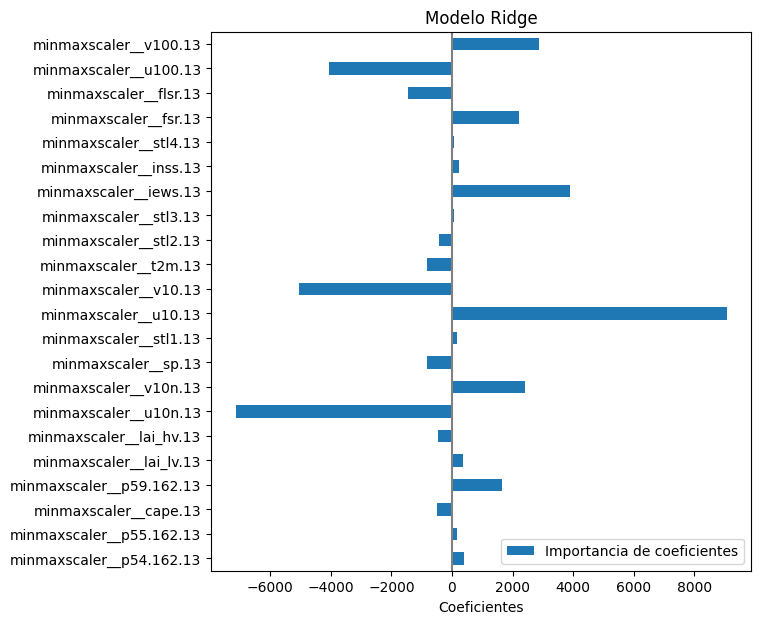

In [161]:
feature_names = pipe_regrRidge[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrRidge['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Ridge")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

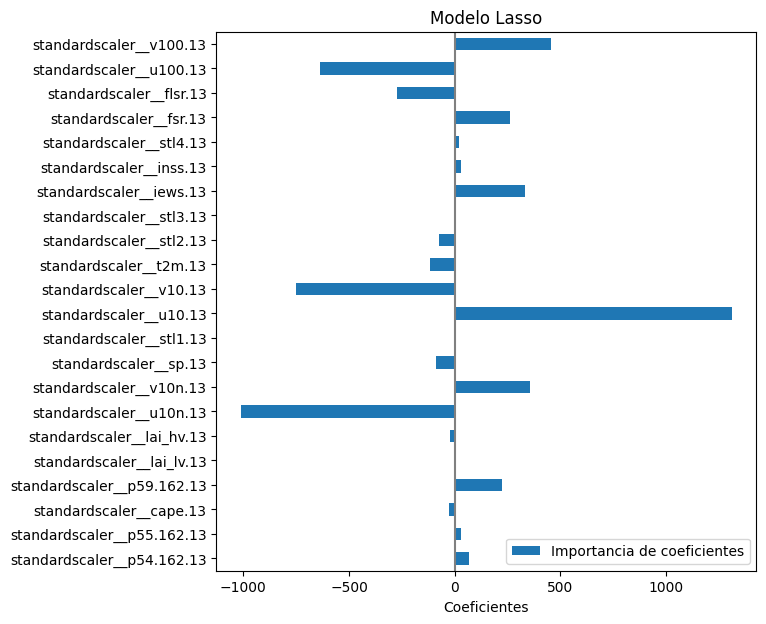

In [162]:
feature_names = pipe_regrLasso[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    pipe_regrLasso['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Lasso")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

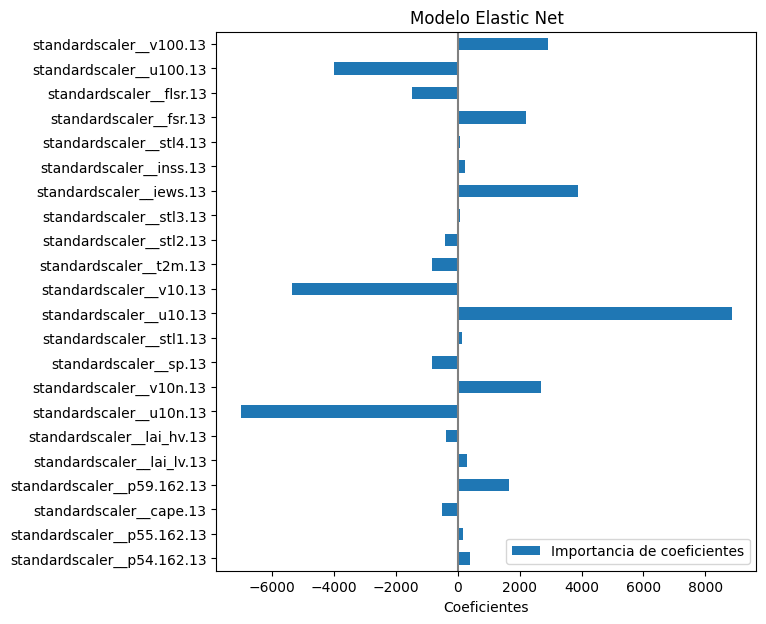

In [163]:
coefs = pd.DataFrame(
    pipe_regrElastic['regresor'].coef_,
    columns=["Importancia de coeficientes"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Modelo Elastic Net")
plt.xlabel("Coeficientes")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Tampoco varía mucho la importancia de los coeficientes, pero se puede observar que con el modelo de Lasso algunos de los coeficientes llegan a valer 0.

### SVM

Para crear este modelo, primero debemos normalizar los datos utilizando la normalización standar. Primero vamos a hacer un modelo SVR con un kernel lineal sin ajustar sus hiperparámetros.

In [164]:
# Creación del modelo SVM
# ==============================================================================
modeloSVR = SVR(kernel = 'linear')

pipe_regr_lineal = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_lineal.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_lineal = t2 -t1
y_test_pred = pipe_regr_lineal.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_lineal)

RMSE: 590.3226215492126
R2: 0.21721726519356954
Tiempo de entrenamiento:  0.2986643314361572


A continuación proceedemos a realizar el ajuste de hiperparámetros para tratar de mejorar el modelo.


In [165]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

svm_lineal_hp = GridSearchCV(pipe_regr_lineal,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
svm_lineal_hp.fit(X=X_train, y=y_train)
t2 = time.time()
t_svm_lineal_hp = t2 -t1
y_test_pred = svm_lineal_hp.predict(X_test)

rmse_svm_hp = rmse(y_test, y_test_pred)
r2_svm_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm_hp}")
print(f"R2: {r2_svm_hp}")
print("Tiempo de entrenamiento: ", t_svm_lineal_hp)
svm_lineal_hp.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RMSE: 580.4898723024722
R2: 0.24307703760644728
Tiempo de entrenamiento:  27.25049901008606


{'SVM__C': 10000}

El último modelo que vamos a probar es un SVM pero con un kernel radial. Primero lo haremos sin ajustar los hiperparámetros

In [166]:
# Creación del modelo SVM radial
# ==============================================================================
modeloSVR = SVR()

pipe_regr_radial = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_radial = t2 -t1
y_test_pred = pipe_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_radial)

RMSE: 637.255997841405
R2: 0.08779961814909787
Tiempo de entrenamiento:  0.4087798595428467


Ahora ajustaremos el hiperparámetro C para intentar conseguir un modelo mejor.

In [167]:
param_grid = {'SVM__C': [0.1, 1, 10, 100, 1000, 10000]}


inner = KFold(n_splits=3, shuffle=True, random_state=100472037)

svm_radial_hp = GridSearchCV(pipe_regr_radial,
                        param_grid,
                        scoring='neg_mean_squared_error',
                        cv=inner,
                        n_jobs=4, verbose=1)


np.random.seed(100472037)
t1 = time.time()
svm_radial_hp.fit(X=X_train, y=y_train)
t2 = time.time()
t_svm_radial_hp = t2 -t1
y_test_pred = svm_radial_hp.predict(X_test)

rmse_svm_r_hp = rmse(y_test, y_test_pred)
r2_svm_r_hp = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm_r_hp}")
print(f"R2: {r2_svm_r_hp}")
print("Tiempo de entrenamiento: ", t_svm_radial_hp)
svm_radial_hp.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
RMSE: 358.5111651320538
R2: 0.7112860575307952
Tiempo de entrenamiento:  5.2054314613342285


{'SVM__C': 1000}

En este caso, el ajuste de hiperparámetros ha mejorado mucho el resultado, tanto que es el modelo con menor error de todos los que se han probado.

### Comparación de modelos

Para comparar los errores y tiempos de ejecución de los modelos, lo mostraremos en la siguiente gráfica. Las barras azules representan el rmse mientras que los puntos rojos representan el tiempo de ejecución, cada uno en su escala correspondiente.

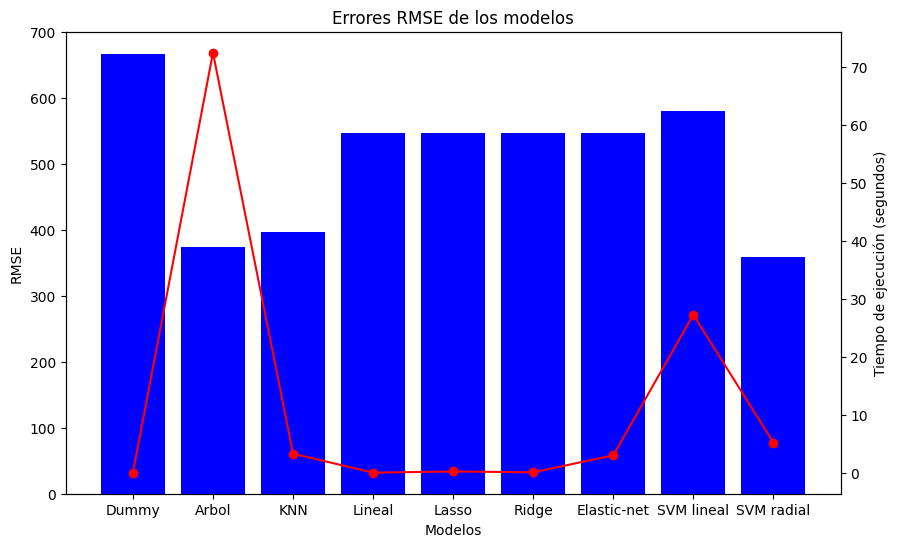

In [168]:
# Lista de modelos y errores RMSE
modelos = ['Dummy', 'Arbol','KNN','Lineal', 'Lasso', 'Ridge', 'Elastic-net', 'SVM lineal', 'SVM radial']
rmse = [rmse_mean, rmse_tree_hp, rmse_knn_hp, rmse_lineal, rmse_lasso_hp, rmse_ridge_hp, rmse_en, rmse_svm_hp, rmse_svm_r_hp]

# Tiempo de ejecución de cada modelo (ejemplo)
tiempo_ejecucion = [t_dummy_mean, t_tree_hp, t_knn_hp, t_lineal, t_lasso_hp, t_ridge_hp, t_en, t_svm_lineal_hp, t_svm_radial_hp]

# Crear gráfico de barras
fig, ax1 = plt.subplots(figsize = (10, 6))

# Configurar ejes y etiquetas
ax1.bar(modelos, rmse, color='blue')
ax1.set_xlabel('Modelos')
ax1.set_ylabel('RMSE')
ax1.set_title('Errores RMSE de los modelos')

# Crear segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
ax2.plot(modelos, tiempo_ejecucion, color='red', marker='o')
ax2.set_ylabel('Tiempo de ejecución (segundos)')

# Mostrar gráfico
plt.show()


A partir de los modelos desarrollados, se pueden obtener las siguientes conclusiones:
- Todos los modelos mejoran el resultado del modelo trivial. Esto era lo esprable ya que el modelo trivial solo usaba la media para dar un resultado.
- El modelo que más ha mejorado el error cuadrático medio ha sido el SVM con kernel radial después de haber ajustado sus hiperparámetros. Además, el timepo de ejecución de este modelo no es mucho más alto que el resto.
- El siguiente modelo que obtenía mejor error era el árbol de regresión pero tiene un timepo de ejecucución mucho más alto que el resto.
- Los modelos de regresión lineal son muy parecidos en cuanto a tiempo de ejecución y error.
El modelo que vamos a usar a partir de ahora es el SVM radial porque es el que da mejores resultados.

## Modelo final

El modelo final que vamos a usar es el SVM radial con normalización estándar de los datos. Como hemos podido comporbar antes, el mejor valor del hiperparámetro C es 1000, por lo que es el que utilizaremos en el modelo. La estimación del error es la siguiente.

In [171]:
# Creación del modelo SVM radial
# ==============================================================================
modeloSVR = SVR(C= 1000)

pipe_regr_radial = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
pipe_regr_radial.fit(X_train, y_train) #entrena
t2 = time.time()
t_svm_radial = t2 -t1
y_test_pred = pipe_regr_radial.predict(X_test)

rmse_svm = rmse(y_test, y_test_pred)
r2_svm = r2(y_test, y_test_pred)
print(f"RMSE: {rmse_svm}")
print(f"R2: {r2_svm}")
print("Tiempo de entrenamiento: ", t_svm_radial)

RMSE: 358.5111651320538
R2: 0.7112860575307952
Tiempo de entrenamiento:  0.504042387008667


Para entrenar el modelo final se utilizan todos los datos proporcionados, sin hacer la división entra train y test.

In [172]:
from joblib import dump
modeloSVR = SVR(C= 1000)

modelo_final = Pipeline([
    ('escalar', standar),
    ('SVM', modeloSVR)
])

np.random.seed(100472037)
t1 = time.time()
modelo_final.fit(x, y)
t2 = time.time()
t_final = t2 - t1
# Guardar el modelo entrenado en un archivo .pkl
print("Tiempo de entrenamiento: ", t_final)
dump(modelo_final, 'modelo_final.pkl')

Tiempo de entrenamiento:  1.148214340209961


['modelo_final.pkl']

Ahora vamos a usar el modelo para obtener predicciones sobre los datos de la competición y almacenarlos en un archivo "predicciones.csv"

In [173]:
# Paso 1: Cargar el conjunto de datos de la competición
competicion_data = pd.read_csv('wind_ava.csv.gz', compression="gzip")

# Paso 2: Obtener predicciones utilizando el modelo final
predicciones = modelo_final.predict(competicion_data)

# Paso 3: Guardar las predicciones en un archivo
predicciones_df = pd.DataFrame(predicciones, columns=["Prediccion"])
predicciones_df.to_csv("predicciones.csv", index=False)

## De regresión a clasificación

A continuación se propone convertir el problema de regresión a uno de clasificación. Para ello, se dividirá la energía en lata o baja de la siguiente forma: si la energía está por debajo del tercer cuartil será "baja", en caso contrario será alta. Por lo tanto, vamos a empezar calculando el tercer cuartil de los datos que tenemos.

In [ ]:
# Calcula el tercer cuartil de la variable 'y'
tercer_cuartil = y.quantile(0.75)

print("Tercer cuartil de la variable 'y':", tercer_cuartil)

Tercer cuartil de la variable 'y': 1089.375


Antes de hacer el modelo de clasificación se pide determinar sin las predicciones son peores para valores altos de energía que para valores bajos. Para comporbar esto vamos a hacer las predicciones con todos los datos y después dividir los resultados en enegría alta o baja a partir del tercer cuartil. Después calcularemos el rmse de ambos conjuntos de datos por separado.

In [ ]:
# Hacer predicciones con el modelo final
predicciones = modelo_final.predict(x)

# Dividir las predicciones según los valores de y (por encima o por debajo del tercer cuartil)
predicciones_bajo = predicciones[y <= tercer_cuartil]
predicciones_alto = predicciones[y > tercer_cuartil]

# Calcular métricas de evaluación para cada subconjunto
mse_bajo = rmse(y[y <= tercer_cuartil], predicciones_bajo)
mse_alto = rmse(y[y > tercer_cuartil], predicciones_alto)

# Imprimir las métricas
print("Error valores bajos:", mse_bajo)
print("Error altos:", mse_alto)

Error valores bajos: 251.02525920270472
Error altos: 489.2041960861623


Se puede observar que las predicciones para valores altos de energía son peores que para valores bajos.

In [ ]:
# Define una función para clasificar los valores de 'y' en categorías
def categorizar(valor):
    if valor <= tercer_cuartil:
        return "baja"
    else:
        return "alta"

# Aplica la función a la columna 'y' para crear una nueva columna 'categoria_y'
y_categorico = y.apply(categorizar)
y_categorico.info()
y_categorico.head()

<class 'pandas.core.series.Series'>
RangeIndex: 4748 entries, 0 to 4747
Series name: energy
Non-Null Count  Dtype 
--------------  ----- 
4748 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


0    baja
1    baja
2    alta
3    alta
4    baja
Name: energy, dtype: object

In [177]:
# Probamos el modelo sin aplicar ninguna regularización y con los parámetros por efecto
# ==============================================================================
lr = LogisticRegression(penalty='none', random_state = 42)

pipe_scale_lr = Pipeline([
    ('scale', standar),
    ('lr', lr)])

# Entrenamiento del modelo
# ==============================================================================
cv = KFold(n_splits=3, shuffle=True, random_state = 100472037 )
scores = cross_val_score(pipe_scale_lr, X_train, y_train, scoring='accuracy', cv = cv) #OJO!!! scoring=‘balanced_accuracy’
                                                                                       # ¿Qué diferencia cv=5?
print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'l1', 'l2', 'elasticnet'} or None. Got 'none' instead.


In [182]:
param_grid = [{'lr__penalty': ['l2'],
               'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]


inner = KFold(n_splits=3, shuffle=True, random_state=42)

#budget = 40
# Cross-validation (3-fold) para la búsqueda de hiper-parámetros
clf = GridSearchCV (estimator  = pipe_scale_lr,
                    param_grid = param_grid,
                    scoring='accuracy', #OJO!!! scoring=‘balanced_accuracy’
                    cv=inner,
                    refit=True,
                    n_jobs=-1,
                    verbose=1,
                    return_train_score=True)

np.random.seed(42)

clf.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 35 candidates, totalling 105 fits


ValueError: 
All the 105 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1209, in fit
    check_classification_targets(y)
  File "c:\Python312\Lib\site-packages\sklearn\utils\multiclass.py", line 221, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
